#  Covid 19 Data - Analysis in India

In [27]:
import pyspark
from pyspark.sql import SparkSession

In [28]:
spark = SparkSession.builder.appName('Spark-DataFrame').getOrCreate()

In [103]:
spark

In [107]:
# Load datasets 
covidIndia = spark.read.load("./India.csv", format="csv", sep=",",index=False, inferSchema=True,timestampFormat="dd/MM/yyyy", header=True)


In [108]:
# Rename the column State/UnionTerritory to State and print schema
covidIndia = covidIndia.withColumnRenamed('State/UnionTerritory', 'State')
covidIndia.printSchema()

root
 |-- Sno: integer (nullable = true)
 |-- Date: string (nullable = true)
 |-- Time: string (nullable = true)
 |-- State: string (nullable = true)
 |-- ConfirmedIndianNational: string (nullable = true)
 |-- ConfirmedForeignNational: string (nullable = true)
 |-- Cured: integer (nullable = true)
 |-- Deaths: integer (nullable = true)
 |-- Confirmed: integer (nullable = true)



In [109]:
covidIndia.show(10)

+---+--------+-------+------+-----------------------+------------------------+-----+------+---------+
|Sno|    Date|   Time| State|ConfirmedIndianNational|ConfirmedForeignNational|Cured|Deaths|Confirmed|
+---+--------+-------+------+-----------------------+------------------------+-----+------+---------+
|  1|30/01/20|6:00 PM|Kerala|                      1|                       0|    0|     0|        1|
|  2|31/01/20|6:00 PM|Kerala|                      1|                       0|    0|     0|        1|
|  3|1/2/2020|6:00 PM|Kerala|                      2|                       0|    0|     0|        2|
|  4|2/2/2020|6:00 PM|Kerala|                      3|                       0|    0|     0|        3|
|  5|3/2/2020|6:00 PM|Kerala|                      3|                       0|    0|     0|        3|
|  6|4/2/2020|6:00 PM|Kerala|                      3|                       0|    0|     0|        3|
|  7|5/2/2020|6:00 PM|Kerala|                      3|                       0|    

# find maximin number of cases for a specific date .


In [106]:
import matplotlib.pyplot as plot

+-----------+--------------+----------+----------+
|DateOfStats|TotalConfirmed|TotalCured|TotalDeath|
+-----------+--------------+----------+----------+
|  1/10/2020|       4551901|   3872200|     58667|
+-----------+--------------+----------+----------+



<BarContainer object of 3 artists>

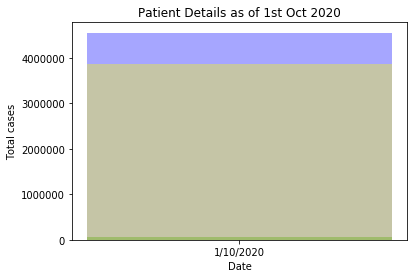

In [119]:
#statistics till the date 1st Oct 2020 

covidIndia.registerTempTable("caseTmpTbl")
analysisDate = spark.sql('select max(Date)as DateOfStats,sum(Confirmed) as TotalConfirmed,sum(Cured) as TotalCured,sum(Deaths) as TotalDeath from caseTmpTbl where Date = "1/10/2020"')
analysisDate.show()

# Data Statistics ploting in the graph
analysisDatePD = analysisDate.toPandas()

cases = [analysisDatePD.TotalConfirmed, analysisDatePD.TotalDeath, analysisDatePD.TotalCured]
plot.title('Patient Details as of 1st Oct 2020')
plot.ylabel('Total cases',fontsize=10)
plot.xlabel('Date',fontsize=10)
plot.bar("1/10/2020", cases,color=['blue','green','yellow'],alpha= 0.35,linewidth=1)

# Finding the total Cured , Confirmed and Deaths by state 
- using groupby on state and finding required sum


In [36]:
from  pyspark.sql import functions as F

In [120]:
covidIndia_State=covidIndia.groupBy(['State']).agg( F.max("Date").alias('AnalysisDate'),F.sum("Cured").alias('Cured'),F.sum('Deaths').alias('Deaths'),F.sum('Confirmed').alias('Confirmed'))

In [121]:
covidIndia_State.show()

+--------------------+------------+--------+------+---------+
|               State|AnalysisDate|   Cured|Deaths|Confirmed|
+--------------------+------------+--------+------+---------+
|            Nagaland|    9/9/2020|  204461|   713|   308510|
|           Karnataka|    9/9/2020|18565416|423834| 26136997|
|              Odisha|    9/9/2020| 6372531| 36326|  8220910|
|              Kerala|    9/9/2020| 4367442| 25309|  6548212|
|Dadra and Nagar H...|    9/9/2020|  146866|   168|   176124|
|              Ladakh|    9/9/2020|  165350|  2118|   234661|
|          Tamil Nadu|    9/9/2020|29121775|567374| 35370756|
|           Telengana|    9/9/2020| 7039298| 60836|  8966019|
|        Chhattisgarh|    9/9/2020| 2197917| 28779|  3545543|
|      Andhra Pradesh|    9/9/2020|25155534|286388| 31971735|
|      Madhya Pradesh|    9/9/2020| 4530581|144102|  6003257|
|              Punjab|    9/9/2020| 3213473|123734|  4422884|
|        Telengana***|    29/07/20|   42909|   480|    57142|
|       

In [122]:
covidIndia_State.printSchema()

root
 |-- State: string (nullable = true)
 |-- AnalysisDate: string (nullable = true)
 |-- Cured: long (nullable = true)
 |-- Deaths: long (nullable = true)
 |-- Confirmed: long (nullable = true)



In [123]:
# to Plot Graph converting Spark DF to Pandas DF
covidIndia_StatePD=(covidIndia_State.toPandas())

In [42]:
#Load state province data in datasets
covidIndiaState = spark.read.load("./covid19_state_data.csv", format="csv", sep=",", inferSchema=True, header=True)

In [43]:
covidIndiaState.printSchema()

root
 |-- Date: string (nullable = true)
 |-- State: string (nullable = true)
 |-- TotalSamples: double (nullable = true)
 |-- Negative: string (nullable = true)
 |-- Positive: double (nullable = true)



In [44]:
covidIndia.printSchema()

root
 |-- Sno: integer (nullable = true)
 |-- Date: string (nullable = true)
 |-- Time: string (nullable = true)
 |-- State: string (nullable = true)
 |-- ConfirmedIndianNational: string (nullable = true)
 |-- ConfirmedForeignNational: string (nullable = true)
 |-- Cured: integer (nullable = true)
 |-- Deaths: integer (nullable = true)
 |-- Confirmed: integer (nullable = true)



In [124]:
# Rename the column as Sample_Date  from  Date
covidIndiaState=covidIndiaState.withColumnRenamed('Date','Sample_Date')

In [125]:
covidIndiaState.show()

+-----------+--------------------+------------+--------+--------+
|Sample_Date|               State|TotalSamples|Negative|Positive|
+-----------+--------------------+------------+--------+--------+
| 2020-04-17|Andaman and Nicob...|      1403.0|    1210|    12.0|
| 2020-04-24|Andaman and Nicob...|      2679.0|    null|    27.0|
| 2020-04-27|Andaman and Nicob...|      2848.0|    null|    33.0|
| 2020-05-01|Andaman and Nicob...|      3754.0|    null|    33.0|
| 2020-05-16|Andaman and Nicob...|      6677.0|    null|    33.0|
| 2020-05-19|Andaman and Nicob...|      6965.0|    null|    33.0|
| 2020-05-20|Andaman and Nicob...|      7082.0|    null|    33.0|
| 2020-05-21|Andaman and Nicob...|      7167.0|    null|    33.0|
| 2020-05-22|Andaman and Nicob...|      7263.0|    null|    33.0|
| 2020-05-23|Andaman and Nicob...|      7327.0|    null|    33.0|
| 2020-05-24|Andaman and Nicob...|      7327.0|    null|    33.0|
| 2020-05-25|Andaman and Nicob...|      7363.0|    null|    33.0|
| 2020-05-

In [128]:
stateDataCalculation = covidIndiaState.join(covidIndia, ['State'],how='left')


In [129]:
stateDataCalculation.printSchema()

root
 |-- State: string (nullable = true)
 |-- Sample_Date: string (nullable = true)
 |-- TotalSamples: double (nullable = true)
 |-- Negative: string (nullable = true)
 |-- Positive: double (nullable = true)
 |-- Sno: integer (nullable = true)
 |-- Date: string (nullable = true)
 |-- Time: string (nullable = true)
 |-- ConfirmedIndianNational: string (nullable = true)
 |-- ConfirmedForeignNational: string (nullable = true)
 |-- Cured: integer (nullable = true)
 |-- Deaths: integer (nullable = true)
 |-- Confirmed: integer (nullable = true)



In [131]:
stateDataCalculation.show()

+--------------------+-----------+------------+--------+--------+----+---------+----------+-----------------------+------------------------+-----+------+---------+
|               State|Sample_Date|TotalSamples|Negative|Positive| Sno|     Date|      Time|ConfirmedIndianNational|ConfirmedForeignNational|Cured|Deaths|Confirmed|
+--------------------+-----------+------------+--------+--------+----+---------+----------+-----------------------+------------------------+-----+------+---------+
|Andaman and Nicob...| 2020-04-17|      1403.0|    1210|    12.0|7021|10/7/2020|8:00:00 AM|                      -|                       -| 3678|    54|     3912|
|Andaman and Nicob...| 2020-04-17|      1403.0|    1210|    12.0|6986|10/6/2020|8:00:00 AM|                      -|                       -| 3659|    54|     3899|
|Andaman and Nicob...| 2020-04-17|      1403.0|    1210|    12.0|6951|10/5/2020|8:00:00 AM|                      -|                       -| 3649|    53|     3884|
|Andaman and Nic

In [132]:
 stateDataCalculationPD = stateDataCalculation.groupBy (["State"]).agg(
    F.sum("Confirmed").alias("ToatalCases"),
    F.max("Confirmed").alias("MaxCases")).show()

+--------------------+-----------+--------+
|               State|ToatalCases|MaxCases|
+--------------------+-----------+--------+
|            Nagaland|   54914780|    6662|
|           Karnataka| 4783070451|  657705|
|              Odisha| 1512647440|  238003|
|              Kerala| 1237612068|  242799|
|Dadra and Nagar H...|   26418600|    3103|
|              Ladakh|   28393981|    4720|
|          Tamil Nadu| 6472848348|  630408|
|        Chhattisgarh|  616924482|  128893|
|      Andhra Pradesh| 5754912300|  729307|
|      Madhya Pradesh| 1104599288|  138668|
|              Punjab|  809387772|  120016|
|             Manipur|   65050416|   12240|
|                 Goa|  244593300|   36238|
|             Mizoram|   15083425|    2148|
|    Himachal Pradesh|  104321520|   16283|
|          Puducherry|  177805971|   29682|
|             Haryana| 1110823824|  136115|
|   Jammu and Kashmir|  637347336|   80476|
|           Jharkhand|  578180058|   88873|
|   Arunachal Pradesh|   6208026

In [70]:
import matplotlib.pyplot as plot
import pandas as pd



+------------+-------------+-------------+-------------+
|AnalysisDate|TotalNegative|TotalPositive| TotalSamples|
+------------+-------------+-------------+-------------+
|   1/10/2020|1.014232299E9|  6.5011591E7|3.468603974E9|
+------------+-------------+-------------+-------------+



<BarContainer object of 3 artists>

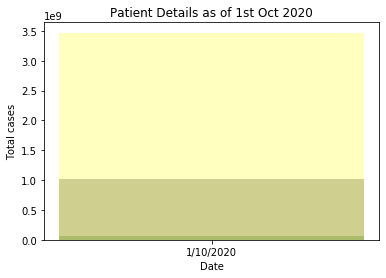

In [134]:

#Covid-19 statistics as of 1st Oct 2020

stateDataCalculation.registerTempTable("StageDataTmpTbl")
TotalcasesbyDate = spark.sql('select max(Date)as AnalysisDate,sum(Negative) as TotalNegative,sum(Positive) as TotalPositive,sum(TotalSamples) as TotalSamples from StageDataTmpTbl where Date = "1/10/2020"')
TotalcasesbyDate.show()

# convert Spark DF to Panda DF to print Graph
TotalcasesbyDatesample = TotalcasesbyDate.toPandas()

# As i am trying to plot graph for 3 fields on Y axis so saving it as a list
# then pass as Y axis parameter to plot values of cured , Deaths and Confirmed patients
cases = [TotalcasesbyDatesample.TotalPositive, TotalcasesbyDatesample.TotalNegative, TotalcasesbyDatesample.TotalSamples]
plot.title('Patient Details as of 1st Oct 2020')
plot.ylabel('Total cases',fontsize=10)
plot.xlabel('Date',fontsize=10)
plot.bar("1/10/2020", cases,color=['green','black','yellow'],alpha= 0.25,linewidth=1)